In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

For this part, we make the use of the preprocessed dataset as a benchmark. We will then modify it 
for the purpose of the study.

In [2]:
df = pd.read_csv('Data/Processed/orders.csv')
df = df.dropna(subset=['order_id','seller_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95976 entries, 0 to 95979
Data columns (total 36 columns):
order_id                         95976 non-null object
customer_id                      95976 non-null object
order_status                     95976 non-null object
order_purchase_timestamp         95976 non-null object
order_approved_at                95976 non-null object
order_delivered_carrier_date     95976 non-null object
order_delivered_customer_date    95976 non-null object
order_estimated_delivery_date    95976 non-null object
payment_sequential               95976 non-null float64
payment_type                     95976 non-null object
payment_installments             95976 non-null float64
payment_value                    95976 non-null float64
customer_unique_id               95976 non-null object
customer_zip_code_prefix         95976 non-null float64
customer_city                    95976 non-null object
customer_state                   95976 non-null object
review_

In [3]:
pd.set_option('display.max_columns', 500)
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,O cliente não comentou,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,O cliente não comentou,O cliente não comentou,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,O cliente não comentou,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,O cliente não comentou,O cliente não comentou,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


## Customer behavior
As a premilinary analysis, we provide basic statistics on the customer purchasing behavior

Number of items purchased at each order

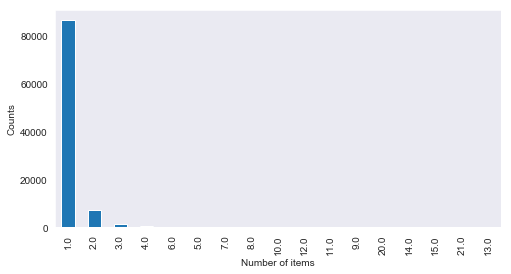

In [4]:

fig = plt.figure(figsize=(8,4))
df.order_item_id.value_counts().plot.bar()
plt.xlabel('Number of items')
plt.ylabel('Counts')

plt.savefig('Counts_Items.eps',bbox_inches = 'tight')


Histogram on average payment (including freight), we discard outliers in the plot for a better representation.

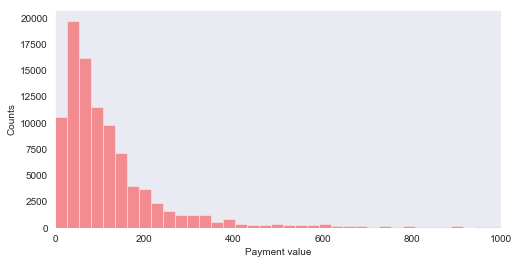

In [5]:
plt.figure(figsize=(8,4))
sns.distplot(df['price'],kde=False,bins=500,color='r')
plt.xlim([0,1000])
plt.xlabel('Payment value')
plt.ylabel('Counts')
plt.savefig('Counts_paymentvalue.eps',bbox_inches = 'tight')

In [6]:
print('The median price is {}'.format((np.median(df['price']))))
print('The mean price is {}'.format((np.mean(df['price']))))

The median price is 86.8
The mean price is 137.14687484371095


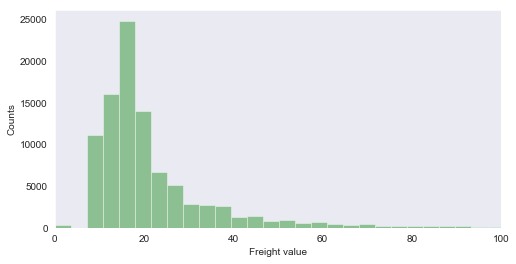

In [7]:
plt.figure(figsize=(8,4))
sns.distplot(df['freight_value'],kde=False,bins=500,color='g')
plt.xlim([0,100])
plt.xlabel('Freight value')
plt.ylabel('Counts')
plt.savefig('Counts_freight.eps',bbox_inches = 'tight')

In [8]:
np.max(df['payment_value'])

13664.08

Customer origin

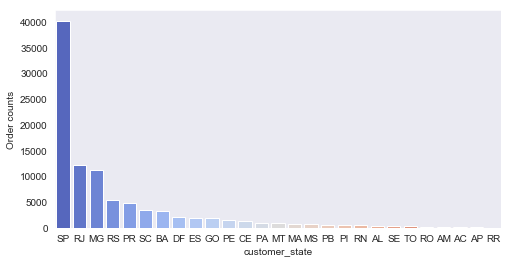

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'customer_state', data = df,order = df['customer_state'].value_counts().index, palette = "coolwarm")
plt.ylabel('Order counts')
plt.savefig('Ordercounts_state.eps',bbox_inches = 'tight')

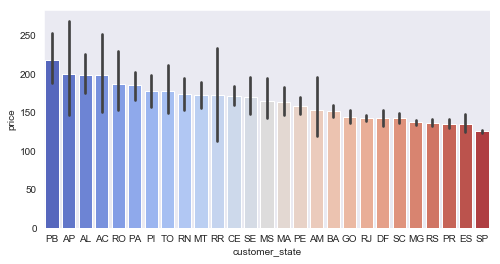

In [10]:
plt.figure(figsize=(8,4))
sns.barplot(x = 'customer_state',y='price',data = df, order = df.groupby('customer_state').agg({'price':'mean'}).sort_values('price',ascending = False).index, palette= "coolwarm")
plt.savefig('Orderprice_state.eps',bbox_inches = 'tight')

In [11]:
order_by_customers = df.customer_unique_id.value_counts().to_frame()
np.max(order_by_customers['customer_unique_id'])

15

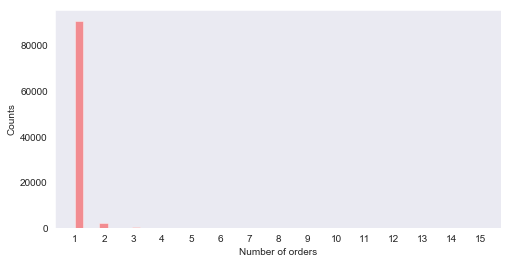

In [12]:
plt.figure(figsize=(8,4))
sns.distplot(order_by_customers['customer_unique_id'],kde=False,color = 'r')
plt.xticks(np.arange(1,16))
plt.xlabel('Number of orders')
plt.ylabel('Counts')
plt.savefig('customer_orders.eps',bbox_inches = 'tight')

# Review statistics

Counts of review score

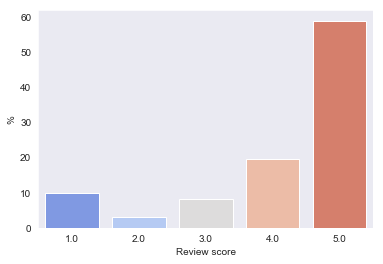

In [13]:
review_counts = df['review_score'].value_counts().to_frame().reset_index()
review_counts['score'] = review_counts['index']
review_counts['review_percentage'] = review_counts['review_score']/sum(review_counts['review_score'])*100
sns.barplot(x='score',y='review_percentage',data=review_counts,palette = "coolwarm")
plt.xlabel('Review score')
plt.ylabel('%')
plt.savefig('review_score.eps')

In [14]:
df.groupby('customer_state').agg({'review_score': 'mean'}).reset_index().sort_values('review_score',ascending = False)


,customer_state,review_score
25,SP,4.236180
17,PR,4.231993
2,AM,4.229167
3,AP,4.223881
22,RS,4.182041
10,MG,4.181915
20,RO,4.175000
26,TO,4.165441
11,MS,4.153295
12,MT,4.135074


Average review by state

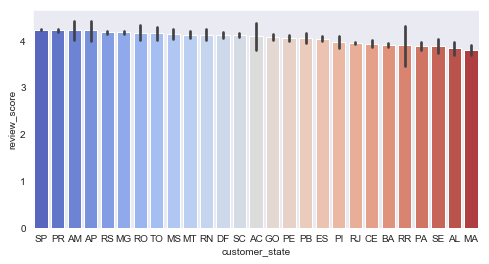

In [15]:
plt.figure(figsize=(8,4))
sns.barplot(x = 'customer_state', y = 'review_score', data = df, order = df.groupby('customer_state').agg({'review_score':'mean'}).sort_values('review_score',ascending = False).index, palette = "coolwarm")
plt.savefig('review_score_state.eps')

# Review analysis
In this part, we use ML techniques to determine what factors are affecting the most review scores.


We create new features that will can have an effect on the review score
- The estimated and real delivery time
- The delay in days (if order arrives in advance, it is just zero delays)
- A binary for review received before delivery. If the review has been received before the delivery: 1 otherwise: 0
- A binary for lateness. If the delivery is delayed: 1 otherwise:0 
- The freight ratio = freight_value/payment_value


In [4]:
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['estimated_delivery_time'] = (df['order_estimated_delivery_date']-df['order_approved_at']).dt.days.astype('timedelta64[D]')
df['real_delivery_time'] = (df['order_delivered_customer_date']-df['order_approved_at']).dt.days.astype('timedelta64[D]')
df['delay'] = (df['order_delivered_customer_date']-df['order_estimated_delivery_date']).dt.days.astype('timedelta64[D]')
df['review_before_delivery'] = (df['order_delivered_customer_date']-df['review_answer_timestamp']).dt.days.astype('timedelta64[D]')

df['estimated_delivery_time'] = (df['estimated_delivery_time']/np.timedelta64(1, 'D')).astype(int)
df['real_delivery_time'] = (df['real_delivery_time']/np.timedelta64(1, 'D')).astype(int)
df['delay'] = (df['delay']/np.timedelta64(1, 'D')).astype(int)
df['review_before_delivery'] = (df['review_before_delivery']/np.timedelta64(1, 'D')).astype(int)

df['delay'] = df['delay'].apply(lambda x: x if x>0 else 0)
df['review_before_delivery'] = df['review_before_delivery'].apply(lambda x: 1 if x>0 else 0)
df['late'] = df['delay'].apply(lambda x: 1 if x>0 else 0)
df['freight_ratio'] = df['freight_value']/df['price']

In [5]:
pd.set_option('display.max_columns', 50)
df.iloc[14]

order_id                                          dcb36b511fcac050b97cd5c05de84dc3
customer_id                                       3b6828a50ffe546942b7a473d70ac0fc
order_status                                                             delivered
order_purchase_timestamp                                       2018-06-07 19:03:12
order_approved_at                                              2018-06-12 23:31:02
order_delivered_carrier_date                                   2018-06-11 14:54:00
order_delivered_customer_date                                  2018-06-21 15:34:32
order_estimated_delivery_date                                  2018-07-04 00:00:00
payment_sequential                                                               1
payment_type                                                           credit_card
payment_installments                                                            10
payment_value                                                               146.45
cust

Distribution of real and estimated delivery times

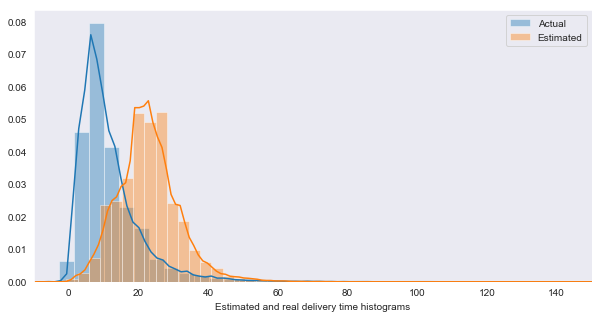

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(df['real_delivery_time'],label='Actual')
sns.distplot(df['estimated_delivery_time'],label='Estimated')
plt.xlabel('Estimated and real delivery time histograms')
plt.legend()
plt.xlim([-10,150])
plt.savefig('histo_real_est.eps')

Boxplot of delay

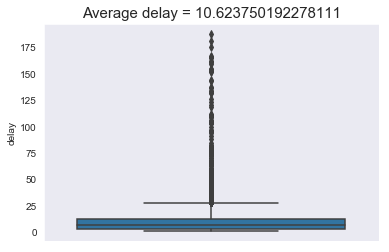

In [50]:
late_deliveries = df[df['delay']>0]
sns.boxplot(y='delay', data=late_deliveries)
plt.title('Late deliveries Delays (days)')
title = 'Average delay = {}'.format(np.mean(late_deliveries['delay']))
plt.title(title, size = 15);
plt.savefig('delay_distr.eps')
plt.show()

In [ ]:
Lateness frequency

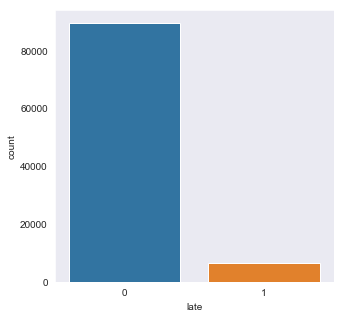

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x='late', data = df)
plt.savefig('late_freq.eps')

In [56]:
print('Late delivery frequency =  {}'.format(np.mean(df['late'])))

Late delivery frequency =  0.06773568392098024


Review survey fulfilled before delivery

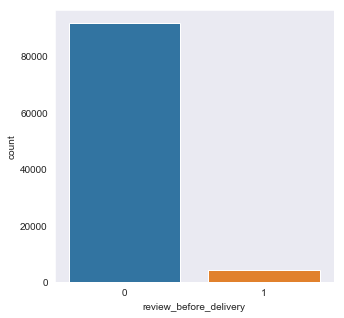

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x='review_before_delivery', data = df)
plt.savefig('review_before_delivery.eps')

Late freq. by state

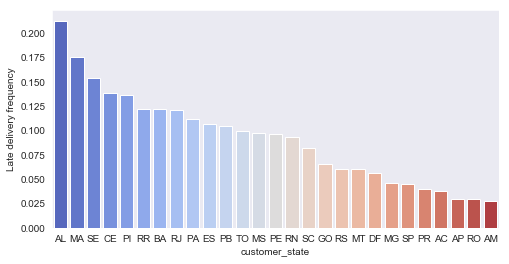

In [25]:
plt.figure(figsize=(8,4))
sns.barplot(x = 'customer_state', y='late', data = df, 
            order = df.groupby('customer_state').agg({'late':'mean'}).sort_values('late', ascending = False).index,ci = None,palette = "coolwarm")
plt.ylabel('Late delivery frequency')
plt.savefig('late_state.eps')

Effect of lateness on review score 

<Figure size 576x288 with 0 Axes>

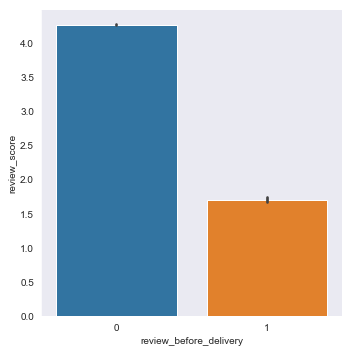

In [23]:
plt.figure(figsize=(8,4))
sns.catplot(x = 'review_before_delivery', y = 'review_score', data = df,kind="bar")
plt.savefig('influence_review_early.eps')

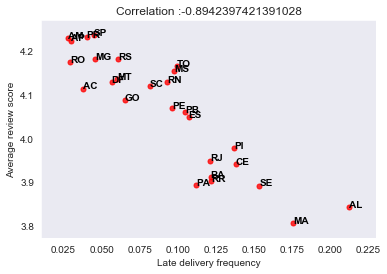

In [6]:
state_late_delivery_freq = df.groupby('customer_state').agg({'late':'mean'}).reset_index()
state_review_score       = df.groupby('customer_state').agg({'review_score':'mean'}).reset_index()
df_state_review = state_late_delivery_freq.merge(state_review_score, how = 'inner', on = 'customer_state')
corr = np.corrcoef(df_state_review.review_score,df_state_review.late)[0,1]
plt.figure(figsize=(6,4))
p1 = sns.regplot(x='late',y='review_score',data = df_state_review, color="r", marker=".",scatter_kws={'s':100},fit_reg=False)

for line in range(0,df_state_review.shape[0]):
     p1.text(df_state_review.late[line], df_state_review.review_score[line], df_state_review.customer_state[line], 
             horizontalalignment='left', size='medium', color='black', weight='semibold')




plt.title('Correlation :{0}'.format(corr), size = 12)
plt.xlabel('Late delivery frequency')
plt.ylabel('Average review score')
plt.savefig('regression_late_review.eps')

In [ ]:
state_review_score

We pick the orders in the dataset that have been delivered

In [13]:
df_delivered = df[df['order_status']=='delivered']


In [14]:
len(df_delivered)

95970

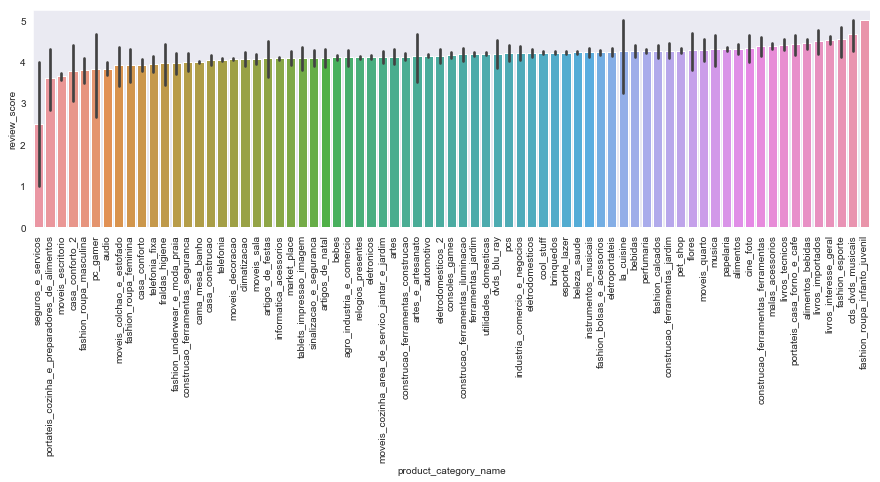

In [15]:
plt.figure(figsize=(15,4))

sns.barplot(x = 'product_category_name',y='review_score',data=df_delivered,
            order = df_delivered.groupby('product_category_name').agg({'review_score':'mean'}).sort_values('review_score').index)
plt.xticks(rotation =90)
plt.savefig('review_category.eps',bbox_inches = 'tight')

We remove irrelevant features, for now we focus only on review scores

In [19]:
df_cs = df_delivered.drop(columns=['order_id','customer_id','order_status','order_purchase_timestamp','order_approved_at', 'product_category_name',
                                           'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','payment_sequential',
                                          'payment_type','payment_installments','customer_unique_id','customer_zip_code_prefix','customer_city','customer_state',
                                   'review_id','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp','shipping_limit_date','seller_id','product_id'])

In [20]:
#df_cs= pd.concat([df_cs[df_cs['review_score'] == 5], df_cs[df_cs['review_score'] == 1]])

df_cs['simplified_review_score'] = df_cs['review_score'].apply(lambda x: 1 if (x==5 or x==4) else 0)
#df_cs.loc[df_cs.review_score == 3, 'simplified_review_score'] = 1

In [21]:
df_cs.dropna(how = 'any', inplace = True)

In [22]:
len(df_cs)

94617

For the following, we remove orders that contain more than one item. Indeed, for orders that contain more than one item 
the preprocessed dataset identify only the first item of the order. Therefore, we choose to add a little bias in order
to account for product features in the forthcoming analysis.

In [23]:
df_cs.order_item_id.value_counts()/len(df_cs)

1.0     0.900155
2.0     0.076614
3.0     0.013507
4.0     0.005136
6.0     0.001998
5.0     0.001987
7.0     0.000233
8.0     0.000085
10.0    0.000074
12.0    0.000053
11.0    0.000042
9.0     0.000032
20.0    0.000021
14.0    0.000021
15.0    0.000021
21.0    0.000011
13.0    0.000011
Name: order_item_id, dtype: float64

In [24]:
df_cs = df_cs[df_cs['order_item_id'] == 1.0
             
             
             
             
             
             ]

In [25]:
df_cs.drop(columns = 'order_item_id',inplace = True)

In [26]:
df_cs.describe()

,payment_value,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,estimated_delivery_time,real_delivery_time,delay,review_before_delivery,late,freight_ratio,simplified_review_score
count,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000,85170.000000
mean,147.717399,4.204720,129.877731,20.370129,48.911013,800.770001,2.284044,2113.764588,30.085640,16.435834,23.045497,22.814113,11.719749,0.742726,0.044898,0.069402,0.302510,0.803323
std,201.075959,1.239122,196.337504,15.965073,9.963835,656.827954,1.763768,3772.707919,16.125337,13.231422,11.754602,8.737923,9.596033,4.727665,0.207082,0.254139,0.307242,0.397489
min,0.010000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,-6.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.072500,4.000000,44.050000,13.430000,43.000000,354.000000,1.000000,300.000000,18.000000,8.000000,15.000000,17.000000,6.000000,0.000000,0.000000,0.000000,0.129591,1.000000
50%,97.200000,5.000000,79.900000,16.500000,52.000000,614.000000,2.000000,700.000000,25.000000,13.000000,20.000000,22.000000,9.000000,0.000000,0.000000,0.000000,0.219733,1.000000
75%,164.847500,5.000000,144.410000,21.380000,57.000000,1003.000000,3.000000,1825.000000,38.000000,20.000000,30.000000,28.000000,15.000000,0.000000,0.000000,0.000000,0.372136,1.000000
max,6929.310000,5.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,153.000000,208.000000,188.000000,1.000000,1.000000,21.447059,1.000000


We remove observations where the real_delivery_time takes negative value




In [27]:
df_cs= df_cs[df_cs['real_delivery_time']>0]
df_cs = df_cs[df_cs['estimated_delivery_time']>0]
df_cs.describe()

,payment_value,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,estimated_delivery_time,real_delivery_time,delay,review_before_delivery,late,freight_ratio,simplified_review_score
count,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000,84958.000000
mean,147.813283,4.204054,129.954155,20.392879,48.907684,800.796476,2.283387,2116.028061,30.095023,16.443301,23.050543,22.844582,11.749865,0.744179,0.044987,0.069470,0.302704,0.803138
std,201.188287,1.239547,196.448575,15.975770,9.965436,657.001403,1.763275,3775.102770,16.128772,13.235132,11.758114,8.722595,9.588646,4.733236,0.207277,0.254253,0.307432,0.397629
min,0.010000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.102500,4.000000,44.400000,13.440000,43.000000,354.000000,1.000000,300.000000,18.000000,8.000000,15.000000,17.000000,6.000000,0.000000,0.000000,0.000000,0.129688,1.000000
50%,97.260000,5.000000,79.900000,16.520000,52.000000,614.000000,2.000000,700.000000,25.000000,13.000000,20.000000,22.000000,9.000000,0.000000,0.000000,0.000000,0.219897,1.000000
75%,165.027500,5.000000,144.410000,21.400000,57.000000,1003.000000,3.000000,1825.000000,38.000000,20.000000,30.000000,28.000000,15.000000,0.000000,0.000000,0.000000,0.372423,1.000000
max,6929.310000,5.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,153.000000,208.000000,188.000000,1.000000,1.000000,21.447059,1.000000


In [28]:
df_cs.drop(columns = ['product_name_lenght','product_height_cm','product_width_cm','product_weight_g','product_length_cm'],inplace = True)

In [29]:
corr = df_cs.apply(lambda x: pd.factorize(x)[0]).corr()

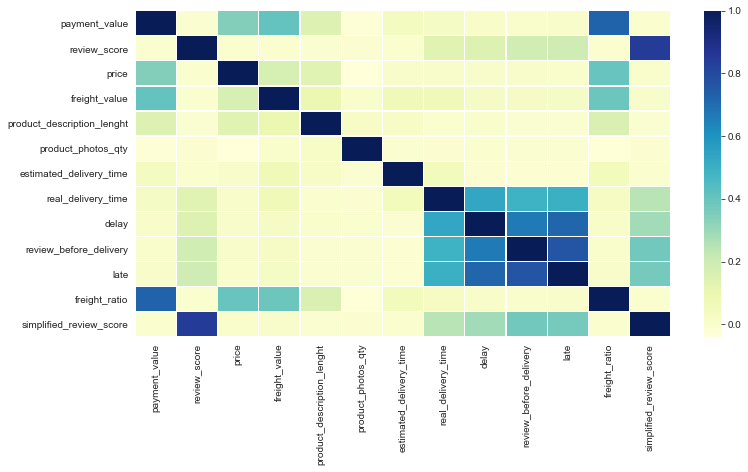

In [30]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")
plt.savefig('corr_review.eps',bbox_inches = 'tight')

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import f1_score

In [32]:
def conf_mat(test_features,test_labels,y_pred,model):

    
    cm = confusion_matrix(test_labels, y_pred)
    score = model.score(test_features,test_labels)
    recall = recall_score(test_labels,y_pred,pos_label = 0)
    precision = precision_score(test_labels,y_pred,pos_label = 0)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score) + '\n' +'Recall Score: {0}'.format(recall) \
    + '\n' + 'Precision Score: {0}'.format(precision)
    plt.title(all_sample_title, size = 15);

In [33]:
features = df_cs.drop(columns=['review_score','simplified_review_score'])
labels = np.array(df_cs['simplified_review_score'])
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

Undersample 

In [34]:
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks




In [35]:
sampler = RandomUnderSampler(random_state=42,replacement=True)
X_rs, y_rs = sampler.fit_resample(train_features, train_labels)

smote = SMOTE(ratio='not majority')
X_train_smote, y_train_smote = smote.fit_sample(train_features,train_labels)

tl = TomekLinks(return_indices=True, ratio='majority')
X_tomek, y_tomek, id_tomek = tl.fit_sample(train_features, train_labels)

#TOMEK AND SMOTE
#X_train_tomek, y_train_tomek, id_tomek = tl.fit_sample(X_train_smote, y_train_smote)


In [36]:
rfc = RandomForestClassifier(n_estimators=40)
rfc.fit(X_rs,y_rs)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

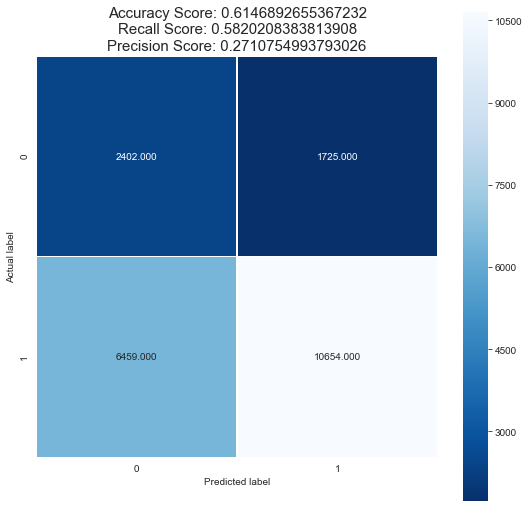

In [37]:

predictions = rfc.predict(test_features)
conf_mat(test_features,test_labels,predictions,rfc)

In [38]:
feature_list = df_cs.drop(columns=['review_score','simplified_review_score']).columns

In [39]:
feature_importances_rfc = pd.DataFrame(rfc.feature_importances_,
                                   index =  feature_list,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [40]:
feature_importances_rfc['importance'] = feature_importances_rfc['importance']/np.max(feature_importances_rfc['importance'])

In [41]:
feature_importances_rfc

,importance
product_description_lenght,1.000000
freight_ratio,0.922437
payment_value,0.897340
freight_value,0.858393
estimated_delivery_time,0.790529
price,0.784773
real_delivery_time,0.784686
product_photos_qty,0.333468
delay,0.326380
late,0.280840


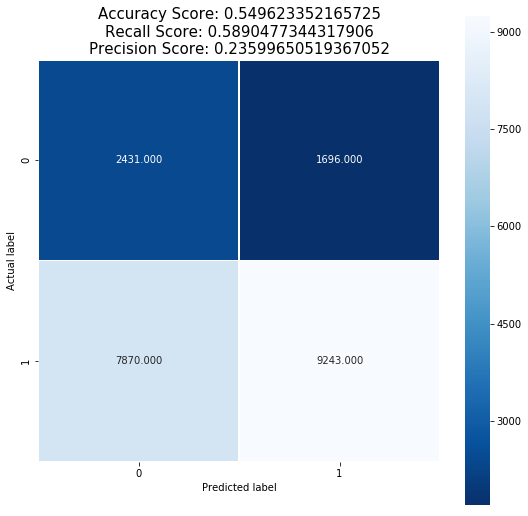

In [64]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_rs,y_rs)
feature_importances_decisiontree = pd.DataFrame(dtc.feature_importances_,
                                   index =  feature_list,
                                    columns=['importance']).sort_values('importance', ascending=False)


predictions = dtc.predict(test_features)
conf_mat(test_features,test_labels,predictions,dtc)

In [65]:
feature_importances_decisiontree['importance']=feature_importances_decisiontree['importance']/np.max(feature_importances_decisiontree['importance'])

In [66]:
feature_importances_decisiontree

,importance
product_description_lenght,1.000000
freight_ratio,0.724778
freight_value,0.720332
estimated_delivery_time,0.712016
delay,0.688859
payment_value,0.585477
price,0.464074
real_delivery_time,0.452189
product_photos_qty,0.273722
review_before_delivery,0.015670


In [67]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_rs,y_rs)

/Users/Paul_Mermod/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [68]:
predictions = etc.predict(test_features)

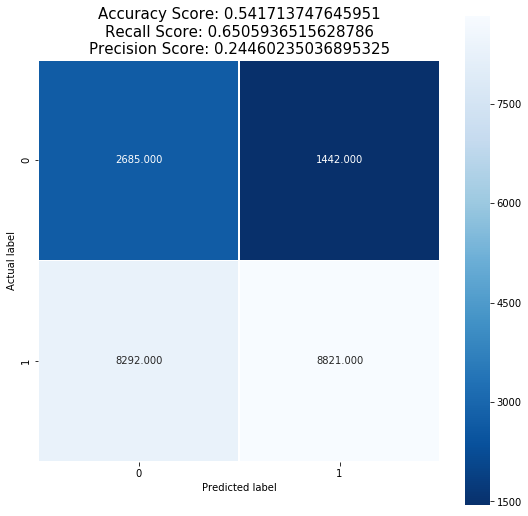

In [69]:
conf_mat(test_features,test_labels,predictions,etc)

In [109]:
feature_importances_etc = pd.DataFrame(etc.feature_importances_,
                                   index =  feature_list,
                                    columns=['importance']).sort_values('importance', ascending=False)



In [110]:
feature_importances_etc['importance'] = feature_importances_etc['importance']/ np.max(feature_importances_etc['importance'])

In [111]:
feature_importances_etc

,importance
estimated_delivery_time,1.000000
product_description_lenght,0.992533
freight_ratio,0.958915
payment_value,0.953040
freight_value,0.943714
price,0.903010
late,0.780103
real_delivery_time,0.750774
product_photos_qty,0.469718
delay,0.199684


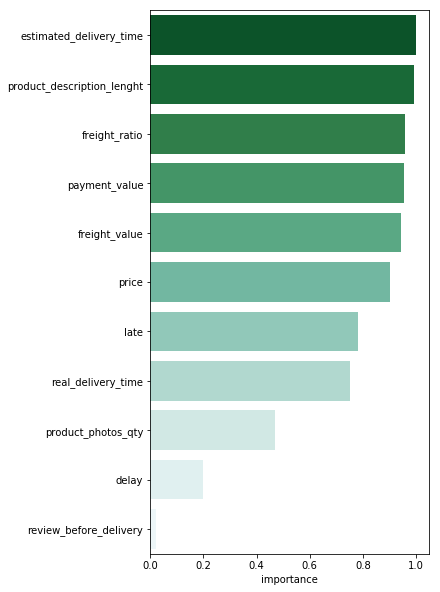

In [112]:
plt.figure(figsize = (5,10))

sns.barplot(y = feature_importances_etc.index, x = feature_importances_etc.importance, data = feature_importances_etc,palette = "BuGn_r")

plt.savefig('etc.eps',bbox_inches = 'tight')


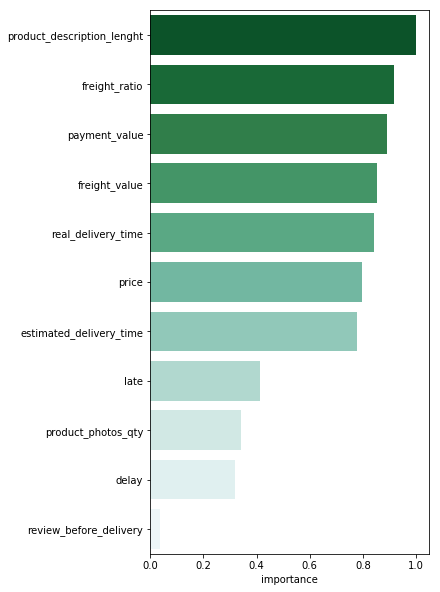

In [113]:
plt.figure(figsize = (5,10))

sns.barplot(y = feature_importances_rfc.index, x = feature_importances_rfc.importance, data = feature_importances_etc,palette = "BuGn_r")

plt.savefig('rfc.eps',bbox_inches = 'tight')

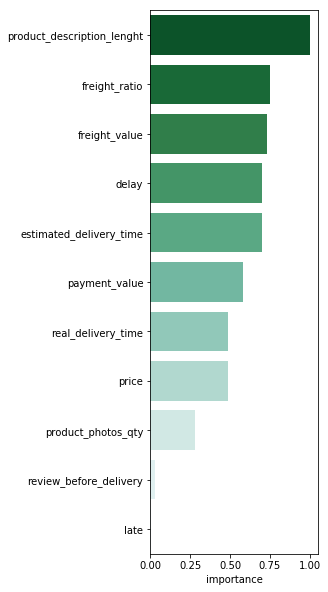

In [61]:
plt.figure(figsize = (3,10))

sns.barplot(y = feature_importances_decisiontree.index, x = feature_importances_decisiontree.importance, data = feature_importances_etc,palette = "BuGn_r")

plt.savefig('dt.eps',bbox_inches = 'tight')

In [142]:
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)
labels = np.array(df_cs['simplified_review_score'])

/Users/Paul_Mermod/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Paul_Mermod/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/Paul_Mermod/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/Paul_Mermod/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


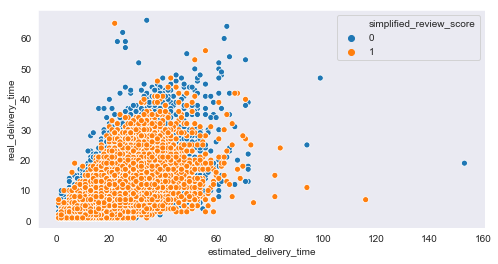

In [43]:
count_class_bad = len(df_cs[df_cs.simplified_review_score == 0])

df_cs_bad = df_cs[df_cs.simplified_review_score == 0]
df_cs_good = df_cs[df_cs.simplified_review_score == 1]
df_cs_good_under = df_cs_good.sample(count_class_bad)
df_cs_under = pd.concat([df_cs_bad, df_cs_good_under], axis=0)



df_cs_under = df_cs_under[df_cs.freight_ratio < 1]
df_cs_under = df_cs_under[df_cs.review_before_delivery == 0]
plt.figure(figsize=(8,4))
sns.scatterplot(x='estimated_delivery_time', y = 'real_delivery_time', data = df_cs_under, hue = 'simplified_review_score')
plt.savefig('est_real_scatter')